<a href="https://colab.research.google.com/github/MazidNawaz/Mental-Health-Analysis-Advanced-Ensemble-Learning/blob/main/Mental_Health_Survey_Kaggle_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s4e11_path = kagglehub.competition_download('playground-series-s4e11')

print('Data source import complete.')


Data source import complete.


In [16]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [17]:
df_train = pd.read_csv("/content/train.csv")
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [18]:
df_test = pd.read_csv("/content/test.csv")
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [19]:
df_train.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


In [20]:
df_test.shape

(93800, 19)

In [21]:
df_test.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,24632
Academic Pressure,75033
Work Pressure,18778
CGPA,75034


In [22]:
df_train.dtypes

,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


In [23]:
df_train.shape

(140700, 20)

In [24]:
df_train = df_train.drop(columns = ["Academic Pressure","Study Satisfaction","CGPA"],axis = 1)
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [25]:
df_test = df_test.drop(columns = ["Academic Pressure","Study Satisfaction","CGPA"],axis = 1)
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,2.0,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,2.0,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,4.0,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,NaN,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,5.0,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [26]:
df_train.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Work Pressure,27918
Job Satisfaction,27910
Sleep Duration,0


### **Data Visualization**

Text(0.5, 1.0, 'Count Plot of Depression')

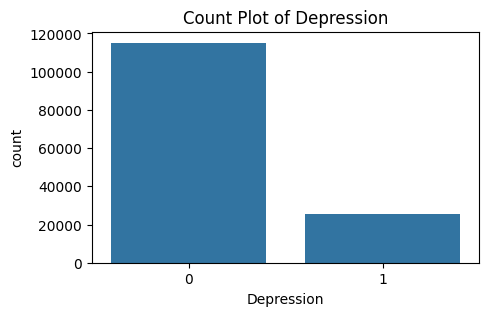

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize = (5,3))
sns.countplot(data=df_train ,x = "Depression")
plt.title("Count Plot of Depression")

In [28]:
numerical_cols = df_train.select_dtypes(include = ['float']).columns.tolist()
numerical_cols

['Age',
 'Work Pressure',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']

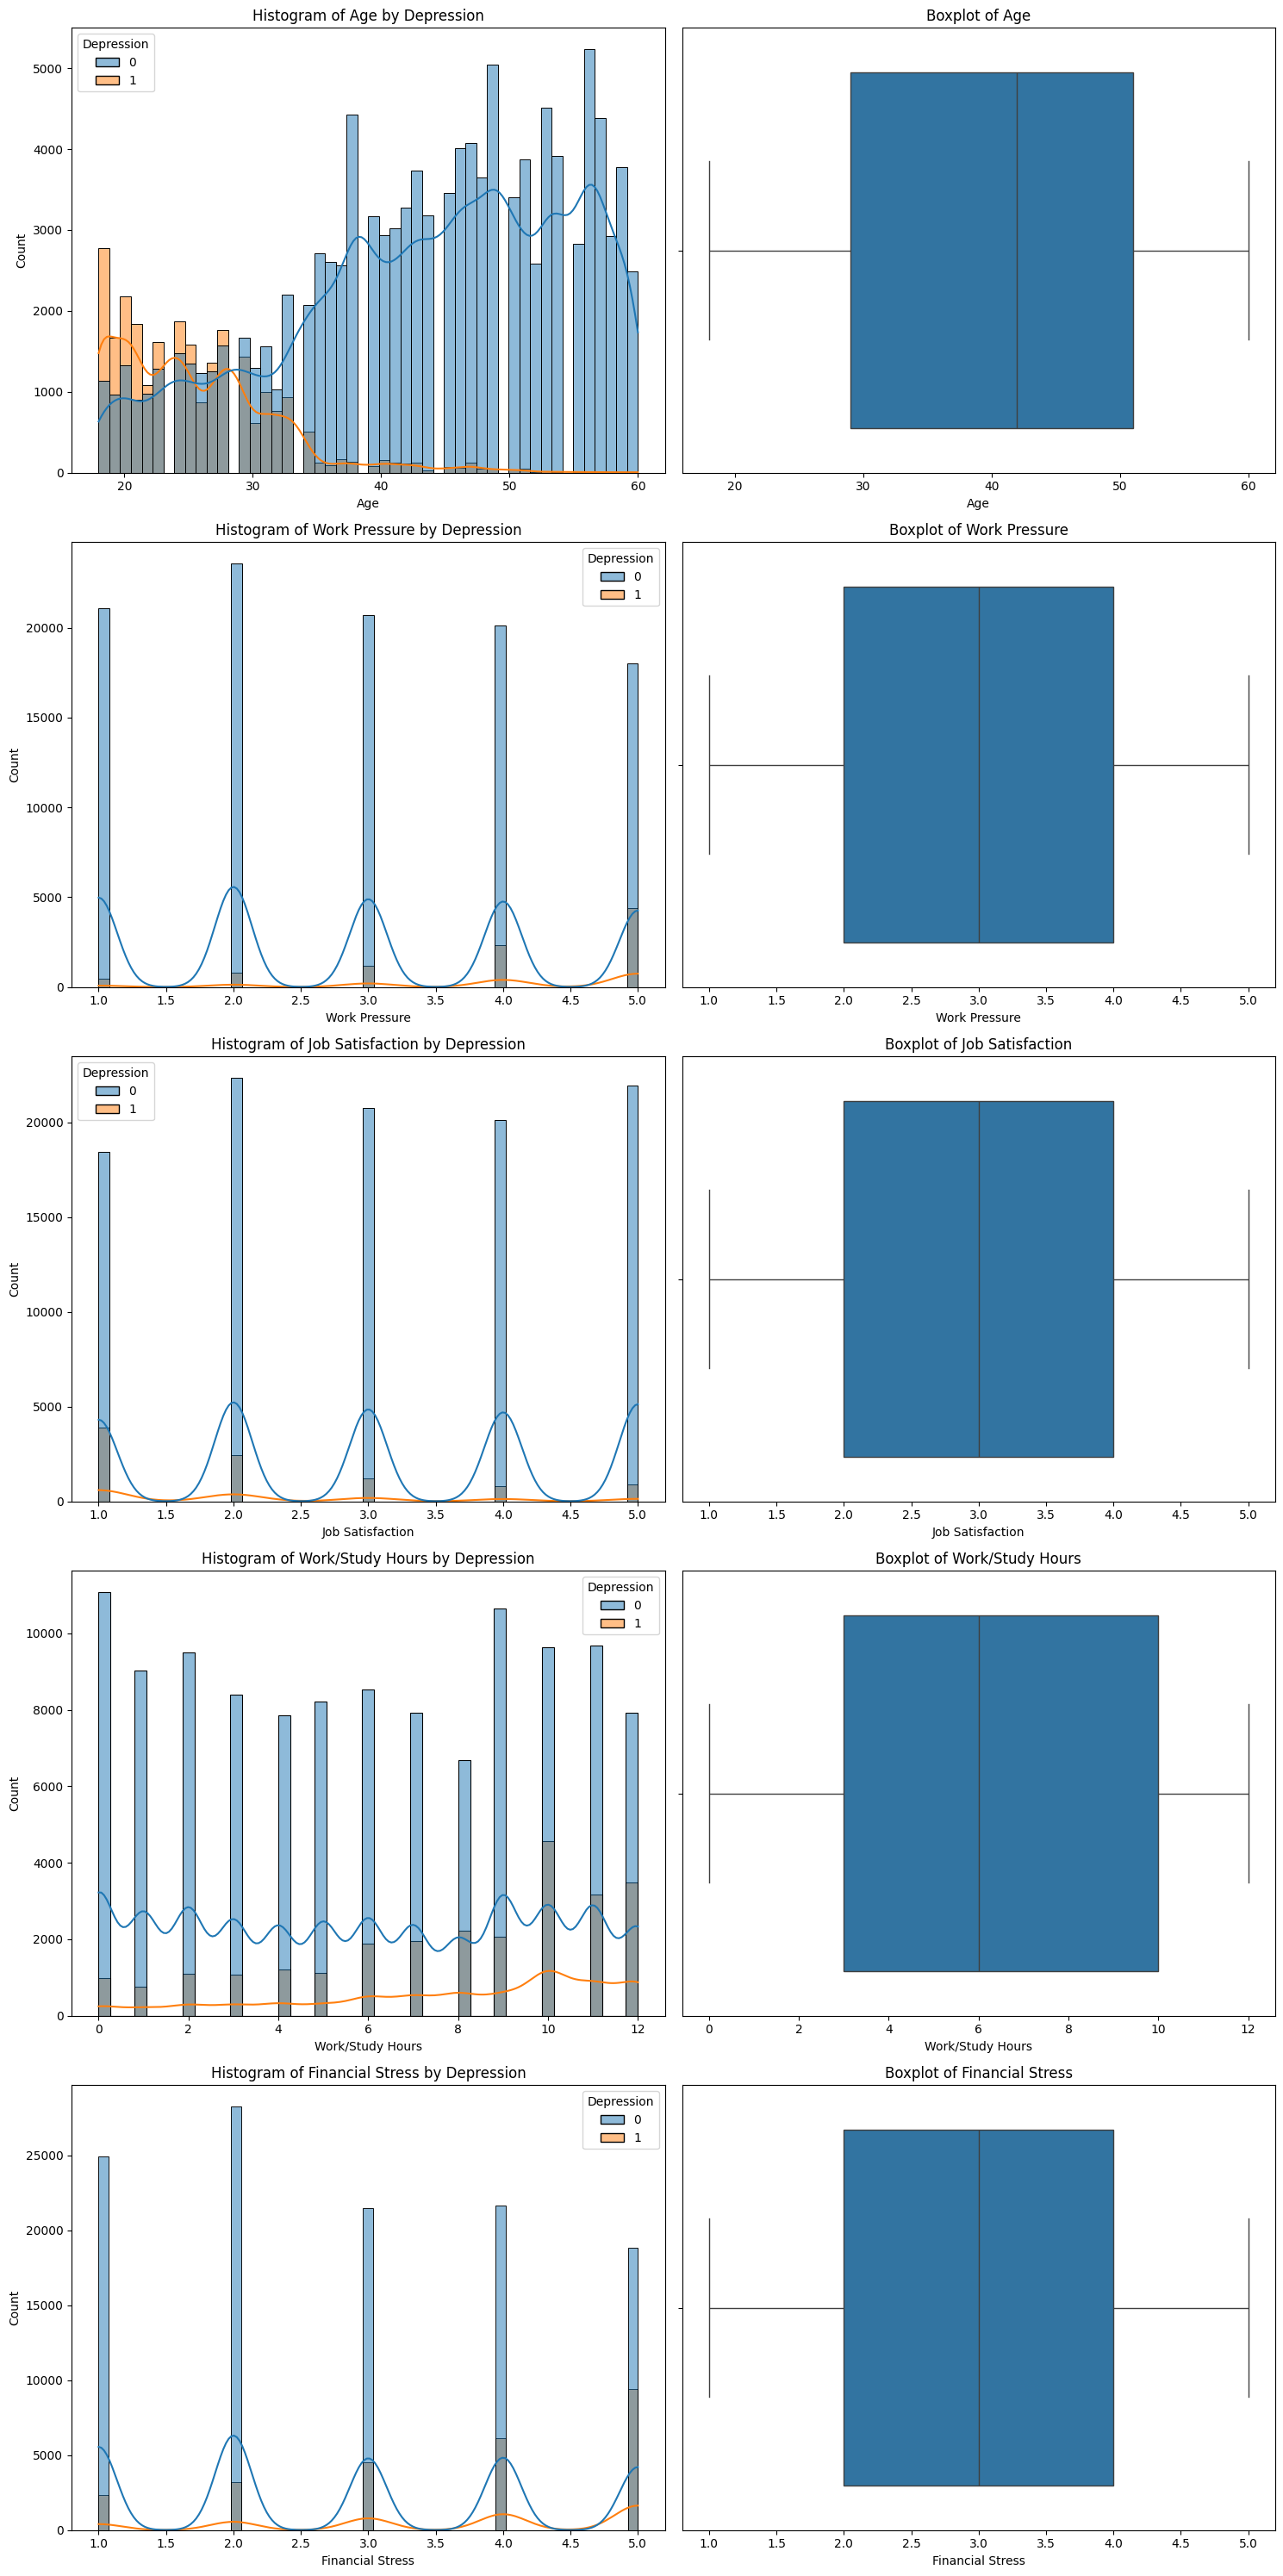

In [29]:
fig, axs = plt.subplots(len(numerical_cols), 2, figsize = (15,30))

for i, col in enumerate(numerical_cols) :

    sns.histplot(data = df_train, x = col, hue = 'Depression',kde=True,ax=axs[i,0])
    axs[i,0].set_title(f'Histogram of {col} by Depression')

    sns.boxplot(data = df_train, x = col, ax= axs[i,1])
    axs[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [30]:
Categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
Categorical_cols = [col for col in Categorical_cols if col not in ['Name',]]
Categorical_cols

['Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

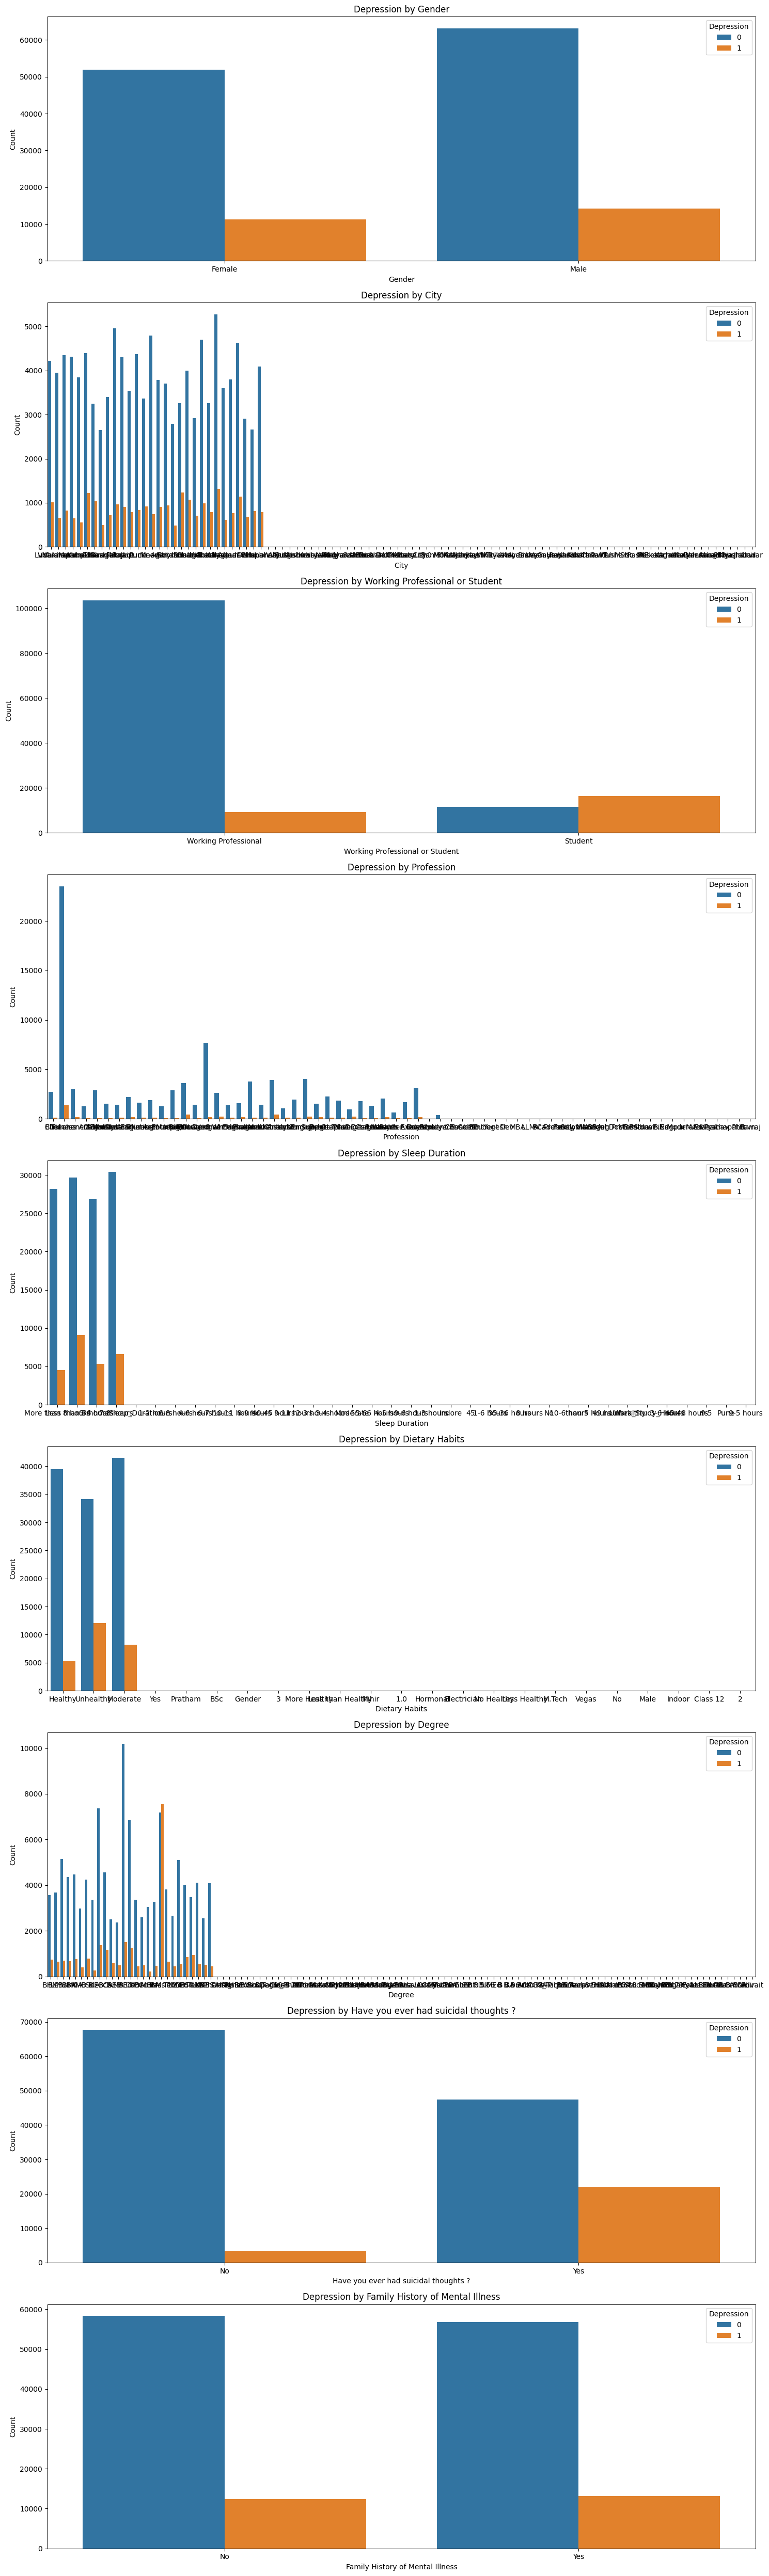

In [31]:
fig,axs = plt.subplots(len(Categorical_cols),1,figsize=(15,50))

for i,col in enumerate(Categorical_cols):

    sns.countplot(data = df_train, x = df_train[col], hue = 'Depression',ax=axs[i])
    axs[i].set_title(f'Depression by {col}')
    axs[i].set_xlabel(f'{col}')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

<Axes: xlabel='Gender'>

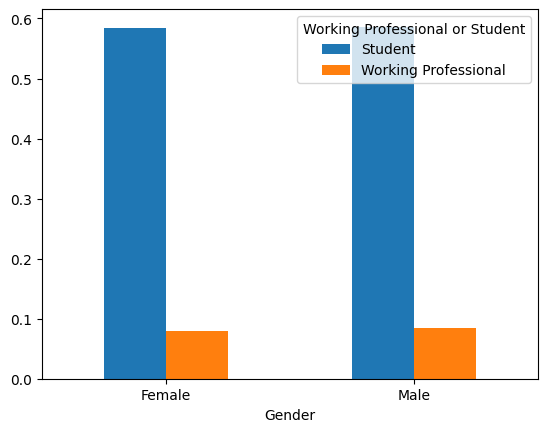

In [32]:
df_train.pivot_table(index = "Gender", columns = "Working Professional or Student", values = "Depression", aggfunc = "mean").plot.bar(rot = 0)

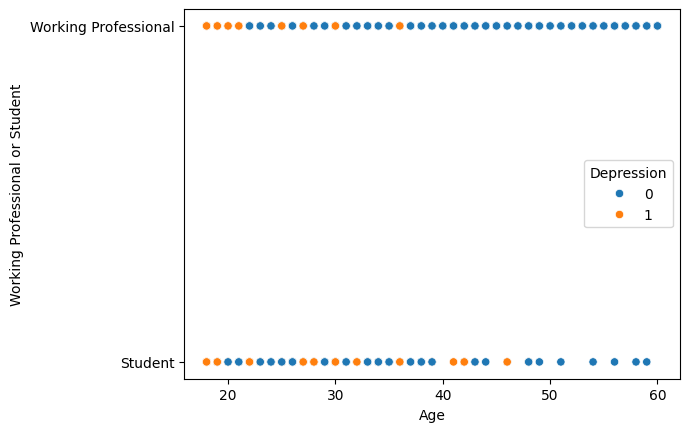

In [33]:
sns.scatterplot(x = df_train["Age"], y = df_train["Working Professional or Student"], hue = df_train["Depression"])
plt.show()

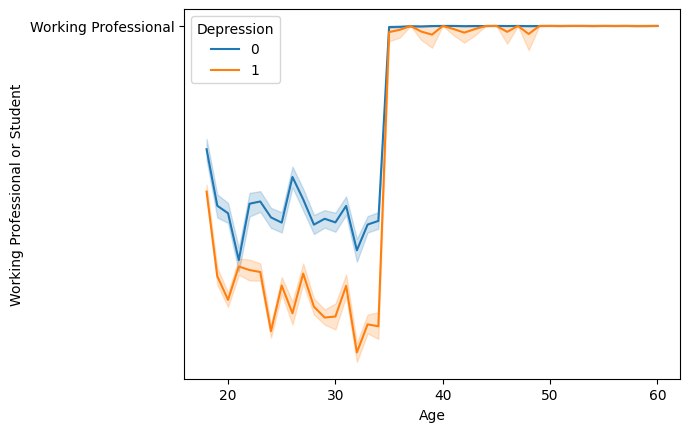

In [34]:
sns.lineplot(x = df_train["Age"], y = df_train["Working Professional or Student"], hue = df_train["Depression"])
plt.show()

In [35]:
df_train["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)


**Working On Missing Values 1. Profession Column**

The 'Profession' of students is left as invalid. Let's see if all the NaN's in the 'Profession' column are students

In [36]:
df_train[df_train['Working Professional or Student'] == 'Student']["Profession"].isnull().sum()

27867

In [37]:
df_test[df_test['Working Professional or Student'] == 'Student']["Profession"].isnull().sum()

18746

In [38]:
df_train[df_train['Working Professional or Student'] == 'Working Professional']['Profession'].isnull().sum()

8763

In [39]:
df_train.loc[df_train['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'
df_train['Profession'] = df_train['Profession'].fillna('Other')

In [40]:
df_test.loc[df_test['Working Professional or Student'] == 'Student', 'Profession'] = 'Student'
df_test['Profession'] = df_test['Profession'].fillna('Other')

In [41]:
df_train.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Work Pressure,27918
Job Satisfaction,27910
Sleep Duration,0


In [42]:
df_test.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Work Pressure,18778
Job Satisfaction,18774
Sleep Duration,0


**2. Working Pressure**

In [43]:
df_train.loc[(df_train["Work Pressure"].isnull()) & (df_train["Working Professional or Student"] == "Working Professional"), "Work Pressure"] = df_train["Work Pressure"].median()
df_train.loc[(df_train["Work Pressure"].isnull()) & (df_train["Working Professional or Student"] == "Student"), "Work Pressure"] = 0

In [44]:
df_test.loc[(df_test["Work Pressure"].isnull()) & (df_test["Working Professional or Student"] == "Working Professional"), "Work Pressure"] = df_test["Work Pressure"].median()
df_test.loc[(df_test["Work Pressure"].isnull()) & (df_test["Working Professional or Student"] == "Student"), "Work Pressure"] = 0

**3. Job Satisfaction and Financial Stress**

In [45]:
for col in ["Job Satisfaction", "Financial Stress"]:
    df_train[col] = df_train[col].fillna(df_train[col].mean())

In [46]:
for col in ["Job Satisfaction"]:
    df_test[col] = df_test[col].fillna(df_test[col].mean())

**4. Dietary Habits and Degree**

In [47]:
for col in ["Dietary Habits", "Degree"]:
    df_train[col] = df_train[col].fillna("UNKNOWN")

In [48]:
for col in ["Dietary Habits", "Degree"]:
    df_test[col] = df_test[col].fillna("UNKNOWN")

In [49]:
df_train.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0


In [50]:
df_test.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0


In [51]:
df_train.dtypes

,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Work Pressure,float64
Job Satisfaction,float64
Sleep Duration,object


In [52]:
df_train["Degree"].value_counts()

,count
Degree,
Class 12,14729
B.Ed,11691
B.Arch,8742
B.Com,8113
B.Pharm,5856
...,...
Vivaan,1
MTech,1
29,1


In [53]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,0.0,2.974404,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [54]:
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,2.0,5.00000,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,2.0,4.00000,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,4.0,1.00000,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,Student,0.0,2.96092,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,5.0,5.00000,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [55]:
df_train["Profession"].value_counts()

,count
Profession,
Student,27905
Teacher,24900
Other,8763
Content Writer,7812
Architect,4362
...,...
City Manager,1
FamilyVirar,1
Family Consultant,1


In [56]:
df_train["Dietary Habits"].value_counts()

,count
Dietary Habits,
Moderate,49705
Unhealthy,46227
Healthy,44741
UNKNOWN,4
Yes,2
No,2
More Healthy,2
Class 12,1
Indoor,1


### *Changing Categorical values to Numerical Values*

In [57]:
Columns = ["City","Profession","Degree","Dietary Habits"]

for column in Columns:
    value_counts = df_train[column].value_counts()
    # Get the categories with counts less than 10
    to_replace = value_counts[value_counts < 10].index
    # Replace those categories with 'Other'
    df_train[column] = df_train[column].replace(to_replace, 'Other')

In [58]:
for column in Columns:
    value_counts = df_test[column].value_counts()
    # Get the categories with counts less than 10
    to_replace = value_counts[value_counts < 10].index
    # Replace those categories with 'Other'
    df_test[column] = df_test[column].replace(to_replace, 'Other')

In [59]:
df_train["Sleep Duration"].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       '49 hours', 'Unhealthy', 'Work_Study_Hours', '3-6 hours',
       '45-48 hours', '9-5', 'Pune', '9-5 hours'], dtype=object)

In [60]:
sleep_duration_mapping={
        "More than 8 hours":9,
        'Less than 5 hours':4,
        '5-6 hours':5.5,
        '7-8 hours':7.5,
        '1-2 hours':1.5,
        '6-8 hours':7,
        '4-6 hours':5,
        '6-7 hours':6.5,
        '10-11 hours':10.5,
        '8-9 hours':8.5,
        '9-11 hours':10,
        '2-3 hours':2.5,
        '3-4 hours':3.5,
        'Moderate':6,
        '4-5 hours':4.5,
        '9-6 hours':7.5,
        '1-3 hours':2,
        '1-6 hours':4,
        '8 hours':8,
        '10-6 hours':8,
        'Unhealthy':3,
        'Work_Study_Hours':6,
        '3-6 hours':3.5,
        '9-5':7,
        '9-5 hours':7,
}

df_train['Sleep Duration'] = df_train['Sleep Duration'].map(sleep_duration_mapping).fillna(np.nan)

In [61]:
df_test['Sleep Duration'] = df_test['Sleep Duration'].map(sleep_duration_mapping).fillna(np.nan)

In [62]:
df_train.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.000000,9.0,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.000000,4.0,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Student,0.0,2.974404,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.000000,4.0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.000000,5.5,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,2.0,5.000000,5.5,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,5.0,2.000000,7.5,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,3.0,4.000000,7.5,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,Student,0.0,2.974404,5.5,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,4.0,1.000000,5.5,Healthy,ME,Yes,7.0,2.0,Yes,0


In [63]:
df_train = df_train.drop(columns=["Name","id"],axis=1)
df_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,5.0,2.000000,9.0,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,4.0,3.000000,4.0,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,Student,0.0,2.974404,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,5.0,1.000000,4.0,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,1.0,1.000000,5.5,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [64]:
df_test = df_test.drop(columns=["Name","id"],axis=1)
df_test.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Visakhapatnam,Working Professional,Judge,2.0,5.00000,4.0,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,2.0,4.00000,4.0,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Jaipur,Working Professional,Teacher,4.0,1.00000,7.5,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Rajkot,Student,Student,0.0,2.96092,9.0,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Kalyan,Working Professional,Teacher,5.0,5.00000,7.5,Moderate,BCA,Yes,3.0,4.0,No


In [65]:
from sklearn.preprocessing import LabelEncoder

df_train["Gender"] = LabelEncoder().fit_transform(df_train["Gender"])
df_train["City"] = LabelEncoder().fit_transform(df_train["City"])
df_train["Working Professional or Student"] = LabelEncoder().fit_transform(df_train["Working Professional or Student"])
df_train["Profession"] = LabelEncoder().fit_transform(df_train["Profession"])
df_train["Dietary Habits"] = LabelEncoder().fit_transform(df_train["Dietary Habits"])
df_train["Degree"] = LabelEncoder().fit_transform(df_train["Degree"])
df_train["Have you ever had suicidal thoughts ?"] = LabelEncoder().fit_transform(df_train["Have you ever had suicidal thoughts ?"])
df_train["Family History of Mental Illness"] = LabelEncoder().fit_transform(df_train["Family History of Mental Illness"])
df_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,49.0,15,1,3,5.0,2.000000,9.0,0,9,0,1.0,2.0,0,0
1,1,26.0,28,1,34,4.0,3.000000,4.0,3,12,1,7.0,3.0,0,1
2,1,33.0,30,0,33,0.0,2.974404,5.5,0,3,1,3.0,1.0,0,1
3,1,22.0,17,1,34,5.0,1.000000,4.0,1,6,1,10.0,1.0,1,1
4,0,30.0,12,1,2,1.0,1.000000,5.5,3,6,1,9.0,4.0,1,0


In [66]:
df_test["Gender"] = LabelEncoder().fit_transform(df_test["Gender"])
df_test["City"] = LabelEncoder().fit_transform(df_test["City"])
df_test["Working Professional or Student"] = LabelEncoder().fit_transform(df_test["Working Professional or Student"])
df_test["Profession"] = LabelEncoder().fit_transform(df_test["Profession"])
df_test["Dietary Habits"] = LabelEncoder().fit_transform(df_test["Dietary Habits"])
df_test["Degree"] = LabelEncoder().fit_transform(df_test["Degree"])
df_test["Have you ever had suicidal thoughts ?"] = LabelEncoder().fit_transform(df_test["Have you ever had suicidal thoughts ?"])
df_test["Family History of Mental Illness"] = LabelEncoder().fit_transform(df_test["Family History of Mental Illness"])
df_test.head()

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,30,1,20,2.0,5.00000,4.0,1,12,0,9.0,3.0,1
1,0,58.0,13,1,12,2.0,4.00000,4.0,1,2,0,6.0,4.0,0
2,1,53.0,10,1,34,4.0,1.00000,7.5,1,0,1,12.0,4.0,0
3,0,23.0,23,0,33,0.0,2.96092,9.0,1,10,1,10.0,4.0,0
4,1,47.0,11,1,34,5.0,5.00000,7.5,1,7,1,3.0,4.0,0


### Modelling

In [67]:
y = df_train['Depression']
X = df_train.drop(['Depression'],axis=1)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9295664534470505


In [71]:
y_output = model.predict(df_test)

In [72]:
df_submission = pd.read_csv("/content/sample_submission.csv")
df_submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [73]:
submission = pd.DataFrame({
    'id': df_submission['id'],
    'Depression': y_output
})

In [74]:
submission.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0


In [75]:
submission.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv
